# Variation weiterer Parameter

Um das neuronale Netz später robust gegenüber Variationen der Bilder zu gestalten, aber gleichzeitig die Anzahl der Trainingsbilder gering zu halten, wird hier das Mittel der künstlichen Bildvariation verwenden (Augmentation)
Hier wird dies zunächst am Beispiel der Bildhelligkeit gezeigt.

Hier werden der reiche nach verschiedene Parameter variiert und abschließend eine Kombination aller Variationen überlagert.

### Vorbereitung (Laden der Bibliotheken, des Bildes und Definition des Iterators)
Analog zum vorherigen Beispiel werden zunächst die notwendigen Bibliotheken und das Bild geladen.

In [1]:
from PIL import Image 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

img = Image.open('Size_Example_1.jpg')
data = np.array(img)
samples = np.expand_dims(data, 0)
print("Dimension des Bildarrays für die Augmentation:")
print(samples.shape)

Dimension des Bildarrays für die Augmentation:
(1, 86, 48, 3)


### Variation Helligkeit
Wiederholung der Variation aus Skript 3

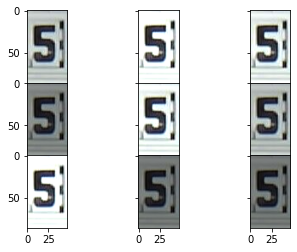

In [2]:
Brightness_Range = 0.5
datagen = ImageDataGenerator(brightness_range = [1-Brightness_Range,1+Brightness_Range])
iterator = datagen.flow(samples, batch_size=1)

fig, axs = pyplot.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(3):
    for y in range (3):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image) 

### Variation Bildposition
Mit Hilfe der Parameter "width_shift_range" und "height_shift_range" wird das Bild um ein Variable Pixelanzahl verschoben. Dabei werden die Ränder ergänzt.

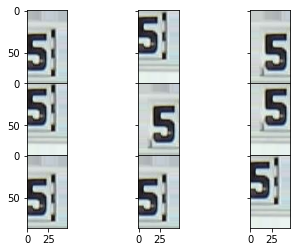

In [3]:
Shift_Range      = 10

datagen = ImageDataGenerator(width_shift_range  = [-Shift_Range,Shift_Range],
                             height_shift_range = [-Shift_Range,Shift_Range])
iterator = datagen.flow(samples, batch_size=1)

fig, axs = pyplot.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(3):
    for y in range (3):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image) 

### Variation Bildrotation
Über den Paramter "rotation_range" wird das Bild gedreht. Die Einheit ist Grad.

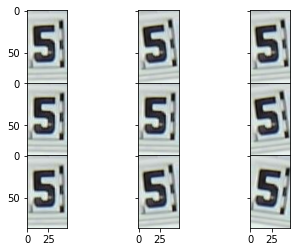

In [5]:
#Image_Augmentation_Parameters
Rotation_Angle   = 10

datagen = ImageDataGenerator(rotation_range     = Rotation_Angle)
iterator = datagen.flow(samples, batch_size=1)

fig, axs = pyplot.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(3):
    for y in range (3):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image) 

### Variation Zoom
Auch die Bildgröße kann über den Parameter "zoom_range" verändert werden. Dabei kann das Bild verzerrt werden, da x- und y-Richtung unabhängig verzerrt werden.

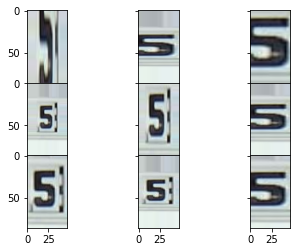

In [6]:
ZoomRange        = 0.8

datagen = ImageDataGenerator(zoom_range         = [1-ZoomRange, 1+ZoomRange])
iterator = datagen.flow(samples, batch_size=1)

fig, axs = pyplot.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(3):
    for y in range (3):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image) 

### Überlagerte Variation
Die Paramter können auch gemeinsam variiert werden. 

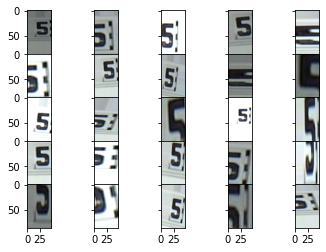

In [6]:
#Image_Augmentation_Parameters
Shift_Range      = 10
Brightness_Range = 0.5
Rotation_Angle   = 10
ZoomRange        = 0.8

datagen = ImageDataGenerator(width_shift_range  = [-Shift_Range,Shift_Range], 
                             height_shift_range = [-Shift_Range,Shift_Range],
                             brightness_range   = [1-Brightness_Range,1+Brightness_Range],
                             zoom_range         = [1-ZoomRange, 1+ZoomRange],
                             rotation_range     = Rotation_Angle)
iterator = datagen.flow(samples, batch_size=1)

fig, axs = pyplot.subplots(5, 5, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(5):
    for y in range (5):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image) 